Initial centroids:
[[5.38152464 5.33977169]
 [2.1044318  1.02016494]
 [8.98742871 2.09322716]]
Converged after 2 iterations:
[[ 5.95227356  6.07003103]
 [ 1.93216218  1.9639913 ]
 [10.06447338  2.00042288]]
Final centroids:
[[ 5.95227356  6.07003103]
 [ 1.93216218  1.9639913 ]
 [10.06447338  2.00042288]]
Number of points in each cluster: [np.int64(50), np.int64(50), np.int64(50)]


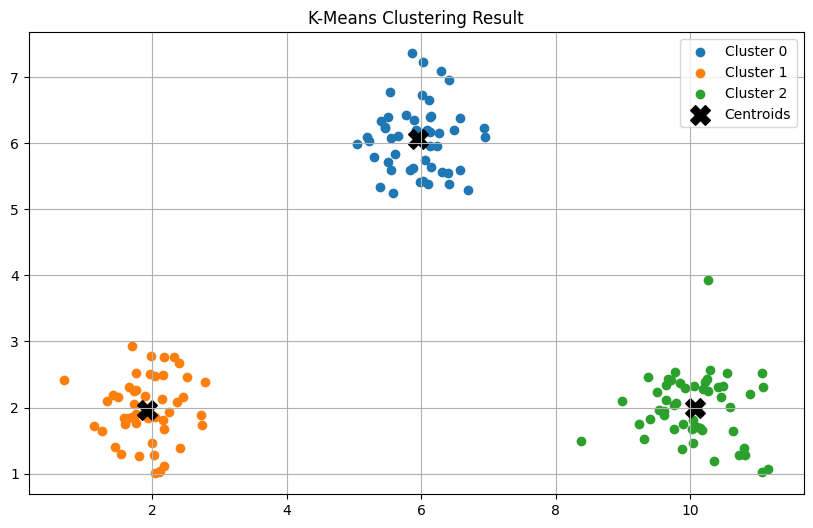

In [45]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
points = np.vstack((
    np.random.normal([2, 2], 0.5, (50, 2)), 
    np.random.normal([6, 6], 0.5, (50, 2)),
    np.random.normal([10, 2], 0.5, (50, 2))
))

K = 3
max_iters = 150

np.random.seed(42)
indices = np.random.choice(points.shape[0], K, replace=False)
centroids = points[indices]

print("Initial centroids:")
print(centroids)

for i in range(max_iters):
    distances = np.linalg.norm(points[:, np.newaxis] - centroids, axis=2)
    
    labels = np.argmin(distances, axis=1)
    
    new_centroids = np.array([points[labels == k].mean(axis=0) for k in range(K)])
    
    if np.allclose(centroids, new_centroids):
        print(f"Converged after {i+1} iterations:")
        print(centroids)
        break
        
    centroids = new_centroids

print("Final centroids:")
print(centroids)
print("Number of points in each cluster:", [np.sum(labels == k) for k in range(K)])

plt.figure(figsize=(10, 6))
for k in range(K):
    cluster_points = points[labels == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {k}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering Result")
plt.legend()
plt.grid(True)
plt.savefig('final_clustering.png')
plt.show()
